# Employee Productivity and Satisfaction HR Data

### Import Python Libraries


In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

### Read and extract the file

In [204]:
# Dataset from https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data?resource=download&select=hr_dashboard_data.csv
hr_data = pd.read_csv('hr_dashboard_data.csv')
hr_data.head(10)

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
5,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740
6,Kyle Figueroa,33,Female,13,41,39,2.3,Sales,Analyst,Jan-18,73502
7,Shannon Allen,23,Female,4,92,68,2.8,HR,Intern,Jan-21,39670
8,Daryl Noble,30,Female,7,32,43,2.3,Marketing,Junior Developer,Jan-19,49323
9,Tracy Figueroa,39,Female,17,10,15,1.1,HR,Team Lead,Jan-04,92915


In [205]:
# Check its datatype and value count
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [206]:
hr_data.describe(include='all')

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
count,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200,200,200,200.000000
unique,200,NaN,2,NaN,NaN,NaN,NaN,5,6,25,NaN
top,Douglas Lindsey,NaN,Male,NaN,NaN,NaN,NaN,Sales,Manager,Jan-18,NaN
freq,1,NaN,100,NaN,NaN,NaN,NaN,47,40,23,NaN
mean,NaN,34.650000,NaN,11.455000,46.755000,49.935000,2.883000,NaN,NaN,NaN,76619.245000
std,NaN,9.797318,NaN,6.408849,28.530068,28.934353,1.123263,NaN,NaN,NaN,27082.299202
min,NaN,22.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,30231.000000
25%,NaN,26.000000,NaN,6.000000,23.000000,25.750000,1.900000,NaN,NaN,NaN,53080.500000
50%,NaN,32.000000,NaN,11.000000,45.000000,50.500000,2.800000,NaN,NaN,NaN,80540.000000
75%,NaN,41.000000,NaN,17.000000,70.000000,75.250000,3.900000,NaN,NaN,NaN,101108.250000


In [207]:
hr_data.shape

(200, 11)

### Data Preparation

In [208]:
# Check if there is a column with NaN value/s
hr_data.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [209]:
# Check if there is a column with duplicated value/s
hr_data.duplicated().sum()

0

In [210]:
# Drop the Name column
hr_data = hr_data.drop(['Name'],axis=1)

In [211]:
# Convert Joining Date into Date Time
hr_data['Joining Date'] = pd.to_datetime(hr_data['Joining Date'], format='%b-%y') 

In [212]:
#Insert new column
hr_data['Year'] = hr_data['Joining Date'].dt.year

# Get the current date
current_date = datetime.datetime.now()
hr_data['Experience'] = current_date.year - hr_data['Year']

In [213]:
# Create a range 
bins = [0, 5, 10, 15, 20, 30]  
labels = ['1-5', '6-10', '11-15', '16-20', '21-25']
hr_data['Experience_Range'] = pd.cut(hr_data['Experience'], bins=bins, labels=labels, right=False)
hr_data.head(5)

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Year,Experience,Experience_Range
0,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,2020,3,1-5
1,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,1999,24,21-25
2,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,2017,6,6-10
3,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,2022,1,1-5
4,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,2005,18,16-20


In [214]:
# Drop the some columns
hr_data = hr_data.drop(['Joining Date', 'Year', 'Experience'],axis=1)
hr_data

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Experience_Range
0,25,Male,11,57,25,4.7,Marketing,Analyst,63596,1-5
1,59,Female,19,55,76,2.8,IT,Manager,112540,21-25
2,30,Male,8,87,10,2.4,IT,Analyst,66292,6-10
3,26,Female,1,53,4,1.4,Marketing,Intern,38303,1-5
4,43,Male,14,3,9,4.5,IT,Team Lead,101133,16-20
...,...,...,...,...,...,...,...,...,...,...
195,29,Female,9,32,87,3.5,HR,Junior Developer,50051,1-5
196,26,Male,7,45,28,2.8,IT,Junior Developer,46612,1-5
197,22,Male,3,36,77,1.6,Finance,Intern,32992,1-5
198,36,Female,23,96,50,3.4,Marketing,Manager,104216,16-20


In [215]:
# Save a copy of the preprocessed data in a csv format
hr_data.to_csv('hr_data_processed.csv', index = True)
hr_data = pd.read_csv('hr_data_processed.csv')
hr_data.head(5)

,Unnamed: 0,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Experience_Range
0,0,25,Male,11,57,25,4.7,Marketing,Analyst,63596,1-5
1,1,59,Female,19,55,76,2.8,IT,Manager,112540,21-25
2,2,30,Male,8,87,10,2.4,IT,Analyst,66292,6-10
3,3,26,Female,1,53,4,1.4,Marketing,Intern,38303,1-5
4,4,43,Male,14,3,9,4.5,IT,Team Lead,101133,16-20


### Exploratory Data Analysis

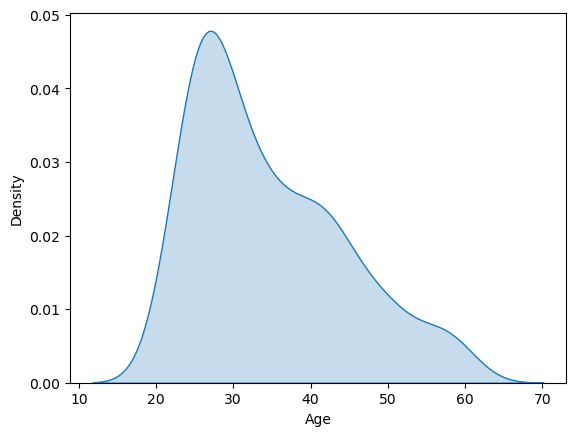

In [216]:
# Use kdeplot to show the density of Age
sns.kdeplot(data=hr_data['Age'], fill = True)
plt.show()

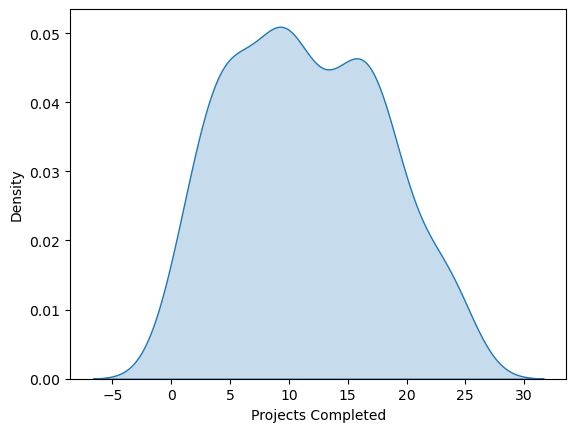

In [217]:
# Use kdeplot to show the density of Projects Completed
sns.kdeplot(data=hr_data['Projects Completed'], fill = True)
plt.show()

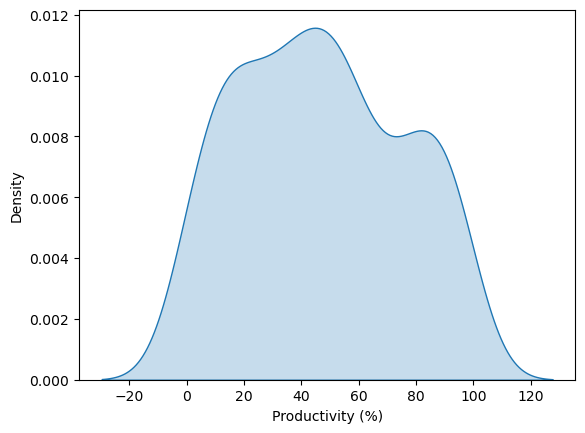

In [218]:
# Use kdeplot to show the density of Productivity (%)
sns.kdeplot(data=hr_data['Productivity (%)'], fill = True)
plt.show()

### Composition of Employee Based on their Gender

In [219]:
# Count the male and female employee
male_count = (hr_data['Gender'] == 'Male').sum()
female_count = (hr_data['Gender'] == 'Female').sum()
print(f'Total number of male employees are {male_count}')
print(f'Total number of female employees are {female_count}')

Total number of male employees are 100
Total number of female employees are 100


In [220]:
# Data
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#43C6DB', '#E3F9A6']

# Create a pie chart with hover labels
fig = px.pie(names=labels, values=sizes, color_discrete_sequence=colors, template='plotly_dark',
             title="Employee Gender Composition", 
             labels={'names': 'Gender', 'values': 'Counts'})

# Show the plot
fig.show()

### Total number of Projects Completed based on their Gender

In [221]:
gender_data = hr_data.groupby('Gender').sum(numeric_only = True)['Projects Completed'].reset_index()
gender_data.columns = ['Gender','Project_Completed']
gender_data

,Gender,Project_Completed
0,Female,1194
1,Male,1097


In [222]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(gender_data, x = 'Gender', y = 'Project_Completed', color = 'Gender', template='plotly_dark',
              color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Projects Completed')
fig.update_layout(title='Total Projects Completed by Gender')

# Show the plot
fig.show()


### Average Productivity Rate of the Employees by Gender

In [223]:
gender_data1 = hr_data.groupby('Gender').mean(numeric_only = True)['Productivity (%)'].reset_index()
gender_data1.columns = ['Gender','Productivity_Rate']
gender_data1

,Gender,Productivity_Rate
0,Female,42.97
1,Male,50.54


In [224]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(gender_data1, x = 'Gender', y = 'Productivity_Rate', color = 'Gender', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Productivity (%)')
fig.update_layout(title='Average Productivity by Gender')

# Show the plot
fig.show()


### Average Satisfaction Rate By Gender

In [225]:
gender_data2 = hr_data.groupby('Gender').mean(numeric_only = True)['Satisfaction Rate (%)'].reset_index()
gender_data2.columns = ['Gender','Satisfaction_Rate']
gender_data2

,Gender,Satisfaction_Rate
0,Female,51.25
1,Male,48.62


In [226]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(gender_data2, x = 'Gender', y = 'Satisfaction_Rate', color = 'Gender', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Satisfaction Rate (%)')
fig.update_layout(title='Average Satisfaction Rate by Gender')

# Show the plot
fig.show()


### Feedback Scores of Employees by Gender

In [227]:
gender_data3 = hr_data.groupby('Gender').mean(numeric_only = True)['Feedback Score'].reset_index()
gender_data3.columns = ['Gender','Feedback_Score']
gender_data3

,Gender,Feedback_Score
0,Female,3.010
1,Male,2.756


In [228]:
# Create a bar plot with the 'plotly_dark' template
custom_colors = ['#43C6DB', '#E3F9A6']

fig = px.bar(gender_data3, x= 'Gender', y = 'Feedback_Score', color= 'Gender', template='plotly_dark',
             color_discrete_sequence = custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Feedback Scores')
fig.update_layout(title='Average Feedback Scores by Gender')

# Show the plot
fig.show()


### Composition of Employees based on their Position

In [229]:
position_count = hr_data['Position'].value_counts().reset_index()
position_count.columns = ['Position','Count']
position_count

,Position,Count
0,Manager,40
1,Junior Developer,35
2,Analyst,33
3,Team Lead,32
4,Intern,30
5,Senior Developer,30


In [230]:
# Data
labels = position_count['Position']
sizes = position_count['Count']
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a pie chart with hover labels
fig = px.pie(names=labels, values=sizes, color_discrete_sequence=colors, template='plotly_dark',
             title="Employee Position Composition", 
             labels={'names': 'Postion', 'values': 'Counts'})

# Show the plot
fig.show()

### Total Number of Projects Completed by Position

In [231]:
position_count1 = hr_data.groupby('Position').sum(numeric_only = True)['Projects Completed'].reset_index()
position_count1.columns = ['Position','Projects_Completed']
position_count1

,Position,Projects_Completed
0,Analyst,310
1,Intern,81
2,Junior Developer,237
3,Manager,799
4,Senior Developer,385
5,Team Lead,479


In [232]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(position_count1, x = 'Position', y = 'Projects_Completed', color = 'Position', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Position')
fig.update_yaxes(title_text='Projects Completed')
fig.update_layout(title='Total Projects Completed by Position')

# Show the plot
fig.show()


### Average Productivity Rate of the Employees by Position

In [233]:
position_count2 = hr_data.groupby('Position').mean(numeric_only = True)['Productivity (%)'].reset_index().round(2)
position_count2.columns = ['Position','Productivity']
position_count2

,Position,Productivity
0,Analyst,44.55
1,Intern,41.33
2,Junior Developer,52.31
3,Manager,48.68
4,Senior Developer,50.23
5,Team Lead,42.38


In [234]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(position_count2, x = 'Position', y = 'Productivity', color = 'Position', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Position')
fig.update_yaxes(title_text='Productivity (%)')
fig.update_layout(title='Total Projects Completed by Position')

# Show the plot
fig.show()


### Average Satisfaction Rate By Position

In [235]:
position_count3 = hr_data.groupby('Position').mean(numeric_only = True)['Satisfaction Rate (%)'].reset_index().round(2)
position_count3.columns = ['Position','Satisfaction_Rate']
position_count3

,Position,Satisfaction_Rate
0,Analyst,39.79
1,Intern,55.27
2,Junior Developer,54.06
3,Manager,55.58
4,Senior Developer,50.40
5,Team Lead,43.41


In [236]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(position_count3, x = 'Position', y = 'Satisfaction_Rate', color = 'Position', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Position')
fig.update_yaxes(title_text='Satisfaction Rate (%)')
fig.update_layout(title='Average Satisfaction of Employees by Position')

# Show the plot
fig.show()


### Average Feedback Scores of Employee by Position

In [237]:
position_count4 = hr_data.groupby('Position').mean(numeric_only = True)['Feedback Score'].reset_index().round(2)
position_count4.columns = ['Position','Feedback_Score']
position_count4

,Position,Feedback_Score
0,Analyst,2.77
1,Intern,2.95
2,Junior Developer,2.85
3,Manager,3.02
4,Senior Developer,2.63
5,Team Lead,3.03


In [238]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(position_count4, x = 'Position', y = 'Feedback_Score', color = 'Position', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Position')
fig.update_yaxes(title_text='Satisfaction Rate (%)')
fig.update_layout(title='Average Satisfaction of Employees by Position')

# Show the plot
fig.show()


### Composition of Employees based on their Department

In [239]:
dep_count = hr_data['Department'].value_counts().reset_index()
dep_count.columns = ['Department','Count']
dep_count

,Department,Count
0,Sales,47
1,Marketing,42
2,Finance,41
3,IT,38
4,HR,32


In [240]:
# Data
labels = dep_count['Department']
sizes = dep_count['Count']
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a pie chart with hover labels
fig = px.pie(names=labels, values=sizes, color_discrete_sequence=colors, template='plotly_dark',
             title="Employee Department Composition", 
             labels={'names': 'Department', 'values': 'Counts'})

# Show the plot
fig.show()

### Total number of Projects Completed based on their Department

In [241]:
dep_count1 = hr_data.groupby('Department').sum(numeric_only = True)['Projects Completed'].reset_index()
dep_count1.columns = ['Department','Projects_Completed']
dep_count1

,Department,Projects_Completed
0,Finance,505
1,HR,337
2,IT,443
3,Marketing,493
4,Sales,513


In [242]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(dep_count1, x = 'Department', y = 'Projects_Completed', color = 'Department', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Department')
fig.update_yaxes(title_text='Projects Completed')
fig.update_layout(title='Total Projects Completed by Department')

# Show the plot
fig.show()


### Average Productivity Rate of Employees by Department

In [243]:
dep_count2 = hr_data.groupby('Department').mean(numeric_only = True)['Productivity (%)'].reset_index().round(2)
dep_count2.columns = ['Department','Productivity']
dep_count2

,Department,Productivity
0,Finance,42.27
1,HR,48.12
2,IT,56.34
3,Marketing,44.26
4,Sales,44.21


In [244]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(dep_count2, x = 'Department', y = 'Productivity', color = 'Department', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Department')
fig.update_yaxes(title_text='Productivity (%)')
fig.update_layout(title='Average Productivity by Department')

# Show the plot
fig.show()


### Average Satisfaction Rate of Employees by Department

In [245]:
dep_count3 = hr_data.groupby('Department').mean(numeric_only = True)['Satisfaction Rate (%)'].reset_index().round(2)
dep_count3.columns = ['Department','Satisfaction_Rate']
dep_count3

,Department,Satisfaction_Rate
0,Finance,50.05
1,HR,51.62
2,IT,54.34
3,Marketing,46.02
4,Sales,48.62


In [246]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(dep_count3, x = 'Department', y = 'Satisfaction_Rate', color = 'Department', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Department')
fig.update_yaxes(title_text='Satisfaction_Rate (%)')
fig.update_layout(title='Average Satisfaction Rate by Department')

# Show the plot
fig.show()


### Average Feedback Scores of Employees by Department

In [247]:
dep_count4 = hr_data.groupby('Department').mean(numeric_only = True)['Feedback Score'].reset_index().round(2)
dep_count4.columns = ['Department','Feedback_Score']
dep_count4

,Department,Feedback_Score
0,Finance,2.71
1,HR,2.62
2,IT,3.01
3,Marketing,3.14
4,Sales,2.88


In [248]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(dep_count4, x = 'Department', y = 'Feedback_Score', color = 'Department', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Department')
fig.update_yaxes(title_text='Feedback Score')
fig.update_layout(title='Average Feedback Score by Department')

# Show the plot
fig.show()


### Project Completion and Salary Relationship

In [249]:
# Custom colors
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a scatter plot with the 'plotly_dark' template and custom colors
fig = px.scatter(hr_data, x='Projects Completed', y='Salary', color='Gender', template='plotly_dark', color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_layout(title='Project Completion and Salary Relationship')

# Show the plot
fig.show()

### Feedback Scores and Salary Relationship

In [250]:
# Custom colors
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a scatter plot with the 'plotly_dark' template and custom colors
fig = px.scatter(hr_data, x='Salary', y='Feedback Score', color='Gender', template='plotly_dark', color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_layout(title='Feedback Scores and Salary Relationship')

# Show the plot
fig.show()

### Salary and Productivity Rate Relationship

In [251]:
# Custom colors
custom_colors = ['#43C6DB', '#E3F9A6']

# Create a scatter plot with the 'plotly_dark' template and custom colors
fig = px.scatter(hr_data, x='Salary', y='Productivity (%)', color='Gender', template='plotly_dark', color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_layout(title='Feedback Scores and Salary Relationship')

# Show the plot
fig.show()

### Composition of Employees based on their Department

In [252]:
exp_count = hr_data['Experience_Range'].value_counts().reset_index()
exp_count.columns = ['Experience_Range','Count']
exp_count

,Experience_Range,Count
0,1-5,72
1,6-10,46
2,16-20,36
3,11-15,30
4,21-25,16


In [253]:
# Data
labels = exp_count['Experience_Range']
sizes = exp_count['Count']
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a pie chart with hover labels
fig = px.pie(names=labels, values=sizes, color_discrete_sequence=colors, template='plotly_dark',
             title="Employee Working Experience Composition", 
             labels={'names': 'Experience_Range', 'values': 'Counts'})

# Show the plot
fig.show()

### Total number of Projects Completed based on their Working Experience

In [263]:
# Define the custom sorting order
custom_order = ['1-5', '6-10', '11-15', '16-20', '21-25']

# Create a Categorical data type based on the custom order
hr_data['Experience_Range'] = pd.Categorical(hr_data['Experience_Range'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
hr_data_sorted = hr_data.sort_values(by='Experience_Range')
hr_data_sorted.head(5)

,Unnamed: 0,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Experience_Range
0,0,25,Male,11,57,25,4.7,Marketing,Analyst,63596,1-5
62,62,28,Female,5,13,40,4.1,IT,Analyst,70439,1-5
134,134,26,Female,5,53,56,3.9,HR,Intern,38714,1-5
59,59,23,Female,8,23,62,2.0,Sales,Junior Developer,59877,1-5
137,137,25,Male,4,31,90,2.8,IT,Intern,32010,1-5


In [264]:
hr_data_sorted = hr_data.groupby('Experience_Range').sum(numeric_only = True)['Projects Completed'].reset_index()
hr_data_sorted.columns = ['Experience_Range','Projects_Completed']
hr_data_sorted

,Experience_Range,Projects_Completed
0,1-5,417
1,6-10,502
2,11-15,493
3,16-20,590
4,21-25,289


In [272]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(hr_data_sorted, x = 'Experience_Range', y = 'Projects_Completed', color = 'Experience_Range', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Work Experience')
fig.update_yaxes(title_text='Projects Completed')
fig.update_layout(title='Total Projects Completed by Working Experience')

# Show the plot
fig.show()


### Average Productivity Rate of Employees by Working Experience

In [269]:
hr_data_sorted1 = hr_data.groupby('Experience_Range').mean(numeric_only = True)['Productivity (%)'].reset_index().round(2)
hr_data_sorted1.columns = ['Experience_Range','Productivity']
hr_data_sorted1

,Experience_Range,Productivity
0,1-5,43.14
1,6-10,52.00
2,11-15,48.50
3,16-20,41.31
4,21-25,56.94


In [273]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(hr_data_sorted1, x = 'Experience_Range', y = 'Productivity', color = 'Experience_Range', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Work Experience')
fig.update_yaxes(title_text='Productivity (%)')
fig.update_layout(title='Average Productivity by Working Experience')

# Show the plot
fig.show()

### Average Satisfaction Rate of Employees By Working Experience

In [274]:
hr_data_sorted2 = hr_data.groupby('Experience_Range').mean(numeric_only = True)['Satisfaction Rate (%)'].reset_index().round(2)
hr_data_sorted2.columns = ['Experience_Range','Satisfaction_Rate']
hr_data_sorted2

,Experience_Range,Satisfaction_Rate
0,1-5,49.25
1,6-10,48.15
2,11-15,56.30
3,16-20,43.81
4,21-25,60.00


In [277]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(hr_data_sorted2, x = 'Experience_Range', y = 'Satisfaction_Rate', color = 'Experience_Range', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Work Experience')
fig.update_yaxes(title_text='Satisfaction Rate (%)')
fig.update_layout(title='Average Satisfaction Rate by Working Experience')

# Show the plot
fig.show()

### Average Feedback Scores of Employees by Working Experience

In [278]:
hr_data_sorted3 = hr_data.groupby('Experience_Range').mean(numeric_only = True)['Feedback Score'].reset_index().round(2)
hr_data_sorted3.columns = ['Experience_Range','Feedback_Score']
hr_data_sorted3

,Experience_Range,Feedback_Score
0,1-5,2.85
1,6-10,2.98
2,11-15,2.84
3,16-20,2.91
4,21-25,2.77


In [279]:
# Data
custom_colors = ['#43C6DB', '#E3F9A6','#99E0EB','#FFFFFF','#1E899A','#C5F346']

# Create a bar plot with the 'plotly_dark' template
fig = px.bar(hr_data_sorted3, x = 'Experience_Range', y = 'Feedback_Score', color = 'Experience_Range', template='plotly_dark',
             color_discrete_sequence=custom_colors)

# Update the axis labels and title
fig.update_xaxes(title_text='Work Experience')
fig.update_yaxes(title_text='Feedback Scores')
fig.update_layout(title='Average Feedback Scores by Working Experience')

# Show the plot
fig.show()